In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import os
import imageio

# Dimensiones de mundo
m = 1
cm = 1e-2
mm = 1e-3
um = 1e-6
nm = 1e-9


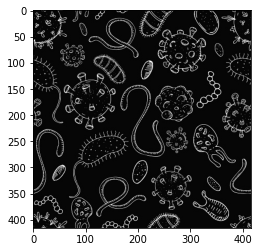

In [6]:
#Imagen a para observar a través del microscopio
%matplotlib inline
obj = cv2.imread('Bacteria.jpg',0)
plt.imshow(obj,"gray")
plt.show()


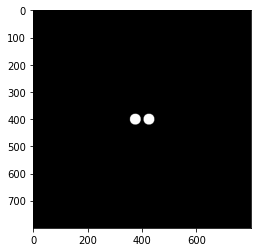

In [7]:
# Imagen para comparar resolución Confocal vs STED
M,N =[800,800]
img =np.zeros((M,N))
cv2.circle(img,(int(M/2)+25,int(N/2)),int(20),1,-1)
cv2.circle(img,(int(M/2)-25,int(N/2)),int(20),1,-1)
plt.imshow(img,"gray")
plt.show()

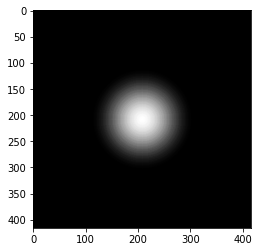

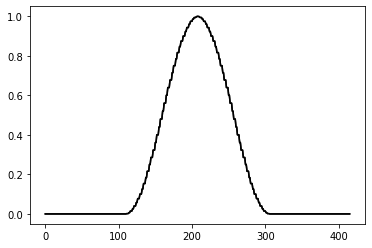

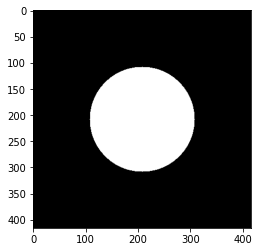

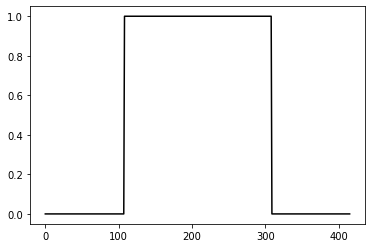

In [15]:

################################################################################################
#Aproximacipon de la mascara efectiva de emisión
M,N =np.shape(obj)
mask=np.zeros((M,N))
radio = 100
for i in np.linspace(1,0,40):
    y = .5*np.sin(np.pi*i-(np.pi/2)) + .5
    cv2.circle(mask,(int(M/2),int(N/2)),int(i*radio),1-y,-1)

plt.imshow(mask,"gray")
plt.show()
plt.plot(np.arange(np.shape(mask)[0]), mask[208,:],'k')
plt.plot(np.arange(np.shape(mask)[0]), mask[208,:],'k')
plt.show()


##################################################################################################

M,N =np.shape(obj)
mask=np.zeros((M,N))
radio = 100
cv2.circle(mask,(int(M/2),int(N/2)),int(radio),1,-1)
plt.imshow(mask,"gray")
plt.show()
plt.plot(np.arange(np.shape(mask)[0]), mask[208,:],'k')
plt.show()

In [8]:
#función del microscopio variando la relación de intesidad del láser STED y de exitación
def STED(obj,dx,I):
    M,N =np.shape(obj)
    sal=np.zeros((M,N))
    I = 1
    radio = (100-(75*I))*nm #radio efectivo del SPOT de emisión
    

    c = 0
    for j in (np.arange(1,int(M/int(radio/dx)), 2)):
        for i in (np.arange(1,int(N/int(radio/dx)), 2)):
            mask=np.zeros((M,N))
            for o in np.linspace(1,0,40):     
                cv2.circle(mask,(int(j*radio/dx),int(i*radio/dx)),int(o*100*nm/dx),1-((0.5*np.sin((np.pi*o)-(np.pi/2))) + 0.5),-1)
                #Mascara efectiva de emisión 

            sec=np.zeros((M,N))
            cv2.circle(sec,(int(j*radio/dx),int(i*radio/dx)),int(radio/dx),1,-1)

            tramo = mask*sec

            c = c +1                
            sec = obj*tramo
            #pille mi so, este es el kernel del codigo
            sal[int((i-1)*radio/dx):int((i+1)*radio/dx),int((j-1)*radio/dx):int((j+1)*radio/dx)] = np.sum(sec)
    return sal
            
  

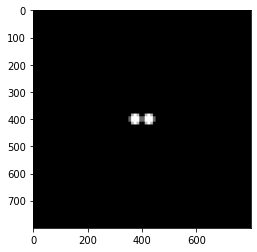

In [31]:
# 2 puntos separados 50 nm bajo metodo STED
plt.imshow(STED(img,5*nm,1),"gray")

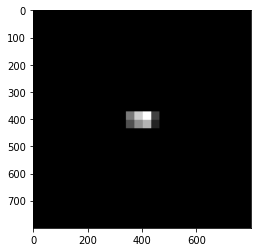

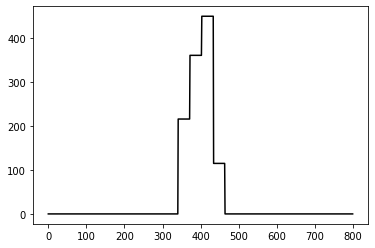

In [60]:
# 2 puntos separados 50 nm bajo metodo CONFOCAL
a = STED(img,5*nm,.3)
plt.imshow((a),"gray")
plt.show()

#Sección trasversal de la imagen tras ser analizada por el microscopio
plt.plot(np.arange(np.shape(a)[0]), a[400,:],'k')
plt.show()


In [46]:
# Se guardan diferentes imagenes de STED variando la relación de intensidad (en un carpeta llamada gif )

c = 0
for i in np.linspace(0,1,10):
    cv2.imwrite("gif/bac"+str(c)+".png",STED(img,5*nm,i))
    c = c + 1


#   cv2.imwrite(" + str(a)+str(b) + ".jpg")    

In [42]:
#Se crea un arreglo de las imagenes de la carpeta gif

# Ubicación de la base de datos
path = 'gif/'
archivos = (os.listdir(path))
img_array = []

#Leer todos los archivos formato imagen desde path
for x in range(0, len(archivos)):
    nomArchivo = "bac"+ str(x) +".png"
    dirArchivo = path + str(nomArchivo)
    
    #Asignar a variable leer_imagen, el nombre de cada imagen
    leer_imagen = imageio.imread(dirArchivo)
    
    # añadir imágenes al arreglo img_array
    img_array.append(leer_imagen)
    
      

In [43]:
#Se crea el gif con las imagenes guardas
imageio.mimwrite('Puntos.gif', img_array, 'GIF', duration=.8)

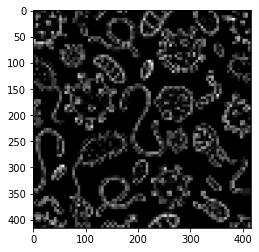

10816


In [11]:

plt.imshow(STED(obj,5*nm,1),"gray") #imagen obj con sted conmpleto (relación intensidad de 1)
plt.show()
print(c) #contador de cuantas operaciones de dieron para producir la imagen